# BUSINESS QUESTIONS

What is the trend of reviews by year or month?
How does proximity affect the center of Seattle in the price of properties?
How does the average length of stay in Seattle vary by property type or neighborhood?

In [38]:
import pandas as pd
import os
import numpy as np
from geopy.distance import geodesic
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
pip install kagglehub

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Using cached geographiclib-2.0-py3-none-any.whl (40 kB)


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("airbnb/seattle")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 19.5M/19.5M [00:00<00:00, 30.4MB/s]

Extracting files...


Path to dataset files: C:\Users\amaur\.cache\kagglehub\datasets\airbnb\seattle\versions\2


#    LOADING THE DATASET

In [7]:
calendar_file_path = os.path.join(path, 'calendar.csv')
calendar_df = pd.read_csv(calendar_file_path)

In [8]:
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [120]:
listings_file_path = os.path.join(path, 'listings.csv')
listings_df = pd.read_csv(listings_file_path)

In [10]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [11]:
reviews_file_path = os.path.join(path, 'reviews.csv')
reviews_df = pd.read_csv(reviews_file_path)

In [12]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


#  EXPLORE THE DATASET

In [18]:
reviews_df.shape

(84849, 6)

In [20]:
calendar_df.shape

(1393570, 4)

In [24]:
calendar_df['date'].min()

'2016-01-04'

In [15]:
listings_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [32]:
#What is the trend of reviews by year or month?
calendar_df['date'] = pd.to_datetime(calendar_df['date'])
calendar_df['year'] = calendar_df['date'].dt.year
calendar_df['month'] = calendar_df['date'].dt.to_period('M')

calendar_df.head()

,listing_id,date,available,price,year,month
0,241032,2016-01-04,t,$85.00,2016,2016-01
1,241032,2016-01-05,t,$85.00,2016,2016-01
2,241032,2016-01-06,f,NaN,2016,2016-01
3,241032,2016-01-07,f,NaN,2016,2016-01
4,241032,2016-01-08,f,NaN,2016,2016-01


In [62]:
calendar_df['price_cleaned'] = calendar_df['price'].replace('[\$,]', '', regex=True).astype(float)

calendar_df = calendar_df.dropna(subset=['price_cleaned'])
calendar_df = calendar_df.sort_values(by=['listing_id', 'date'])

calendar_df['price_changed'] = calendar_df.groupby('listing_id')['price_cleaned'].apply(lambda x: x != x.shift(1))

price_change_count = calendar_df.groupby('listing_id')['price_changed'].sum()

print(price_change_count)

listing_id
3335          1
4291          1
5682         45
6606        105
7369          1
           ... 
10331249      1
10332096      1
10334184      1
10339145     11
10340165      1
Name: price_changed, Length: 3723, dtype: int64


In [67]:
average_price_per_listing = calendar_df.groupby('listing_id')['price_cleaned'].mean()
average_price_per_listing

listing_id
3335        120.000000
4291         82.000000
5682         53.944984
6606         92.849315
7369         85.000000
               ...    
10331249     45.000000
10332096     40.000000
10334184    120.000000
10339145    237.904110
10340165     43.000000
Name: price_cleaned, Length: 3723, dtype: float64

In [77]:
average_price_per_listing = calendar_df.groupby('listing_id')['price_cleaned'].mean().reset_index()
average_price_per_listing = average_price_per_listing.rename(columns={'price_cleaned': 'average_price'})
calendar_df = pd.merge(calendar_df, average_price_per_listing, on='listing_id', how='left')

In [95]:
calendar_df[calendar_df['listing_id']==241032]

,listing_id,date,available,price,year,month,price_cleaned,price_changed,average_price
36913,241032,2016-01-04,t,$85.00,2016,2016-01,85.0,True,85.0
36914,241032,2016-01-05,t,$85.00,2016,2016-01,85.0,False,85.0
36915,241032,2016-01-13,t,$85.00,2016,2016-01,85.0,False,85.0
36916,241032,2016-01-14,t,$85.00,2016,2016-01,85.0,False,85.0
36917,241032,2016-01-18,t,$85.00,2016,2016-01,85.0,False,85.0
...,...,...,...,...,...,...,...,...,...
37254,241032,2016-12-29,t,$85.00,2016,2016-12,85.0,False,85.0
37255,241032,2016-12-30,t,$85.00,2016,2016-12,85.0,False,85.0
37256,241032,2016-12-31,t,$85.00,2016,2016-12,85.0,False,85.0
37257,241032,2017-01-01,t,$85.00,2017,2017-01,85.0,False,85.0


In [79]:
p_calendar_df = calendar_df.drop_duplicates(subset=['listing_id'])
p_calendar_df

,listing_id,date,available,price,year,month,price_cleaned,price_changed,average_price
0,3335,2016-02-29,t,$120.00,2016,2016-02,120.0,True,120.000000
309,4291,2016-01-04,t,$82.00,2016,2016-01,82.0,True,82.000000
674,5682,2016-01-11,t,$50.00,2016,2016-01,50.0,True,53.944984
983,6606,2016-01-04,t,$90.00,2016,2016-01,90.0,True,92.849315
1348,7369,2016-01-14,t,$85.00,2016,2016-01,85.0,True,85.000000
...,...,...,...,...,...,...,...,...,...
932739,10331249,2016-01-15,t,$45.00,2016,2016-01,45.0,True,45.000000
933093,10332096,2016-01-04,t,$40.00,2016,2016-01,40.0,True,40.000000
933458,10334184,2016-01-08,t,$120.00,2016,2016-01,120.0,True,120.000000
933819,10339145,2016-01-04,t,$219.00,2016,2016-01,219.0,True,237.904110


In [83]:
p_calendar_df.describe()

,listing_id,year,price_cleaned,average_price
count,3.723000e+03,3723.000000,3723.000000,3723.000000
mean,5.548051e+06,2016.009132,120.551437,135.764060
std,2.969790e+06,0.095139,86.407680,97.385682
min,3.335000e+03,2016.000000,20.000000,20.000000
25%,3.242426e+06,2016.000000,70.000000,75.629042
50%,6.119821e+06,2016.000000,99.000000,108.416107
75%,8.036802e+06,2016.000000,144.500000,162.099432
max,1.034016e+07,2017.000000,1000.000000,1301.818182


In [80]:
reviews_per_year = p_calendar_df.groupby('year').size()
print(reviews_per_year)

year
2016    3689
2017      34
dtype: int64


In [170]:
reviews_per_month = p_calendar_df.groupby('month').size()
reviews_per_month_cleaned = reviews_per_month.iloc[1:]
print(reviews_per_month_cleaned)

month
2016-02    230
2016-03    126
2016-04     77
2016-05     60
2016-06     50
2016-07     48
2016-08     53
2016-09     64
2016-10     35
2016-11     42
2016-12     36
2017-01     34
Freq: M, dtype: int64


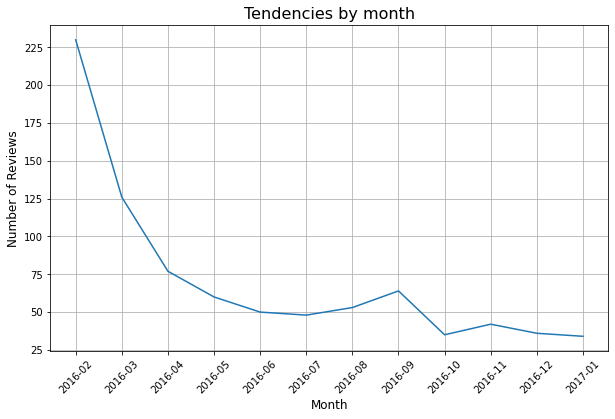

In [173]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=reviews_per_month_cleaned.index.astype(str), y=reviews_per_month_cleaned.values)
plt.title('Tendencies by month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [42]:
#How does proximity affect the center of Seattle in the price of properties?
seattle_center = (47.6205, -122.3493)

In [39]:
geodesic?

In [43]:
def calculate_distance(row):
    property_location = (row['latitude'], row['longitude'])
    return geodesic(property_location, seattle_center).kilometers

In [125]:
listings_df['distance_to_center'] = listings_df.apply(calculate_distance, axis=1)

In [122]:
listings_df = listings_df.rename(columns={'id': 'listing_id'})
listings_df = pd.merge(listings_df, p_calendar_df[['listing_id', 'average_price']], on='listing_id', how='left')
#listings_df = listings_df.rename(columns={'average_price': 'average_price'})

In [114]:
listings_df.isnull()['price'].sum()

0

In [128]:
listings_df['price'] = listings_df['price'].replace('[\$,]', '', regex=True).astype(float)

In [129]:
listings_df[['price','weekly_price','average_price']].head()

,price,weekly_price,average_price
0,85.0,NaN,85.000000
1,150.0,"$1,000.00",170.931271
2,975.0,NaN,1301.818182
3,100.0,$650.00,100.000000
4,450.0,NaN,462.739726


In [131]:
listings_df.describe()['price']

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

In [134]:
bins = [20, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
labels = ['$20-50', '$50-100', '$100-200', '$200-300', '$300-400', '$400-500', '$500-600', '$600-700', '$700-800', '$800-900', '$900-1000']

listings_df['price_range'] = pd.cut(listings_df['price'], bins=bins, labels=labels, right=False)

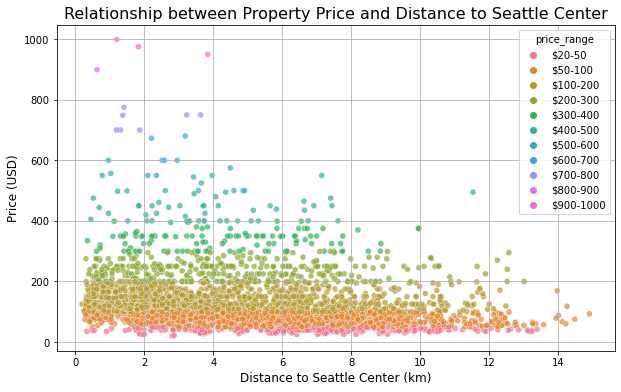

In [135]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_to_center', y='price', data=listings_df, hue='price_range', alpha=0.7)
plt.title('Relationship between Property Price and Distance to Seattle Center', fontsize=16)
plt.xlabel('Distance to Seattle Center (km)', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
#How does the average length of stay in Seattle vary by property type or neighborhood?

In [136]:
calendar__df = pd.read_csv(calendar_file_path)
listings__df  = pd.read_csv(listings_file_path)
reviews__df  = pd.read_csv(reviews_file_path)

In [141]:
listings__df['price'] = listings__df['price'].replace('[\$,]', '', regex=True).astype(float)

In [142]:
calendar__df['date'] = pd.to_datetime(calendar__df['date'])
available_df = calendar__df[calendar__df['available'] == 't']

In [146]:
reserved_neighbourhoods = available_df['listing_id'].unique()
reserved_listings = listings__df[listings__df['id'].isin(reserved_neighbourhoods)]

In [147]:
stay_duration = available_df.groupby('listing_id').agg(stay_days=('date', 'count')).reset_index()
stay_duration = pd.merge(stay_duration, reserved_listings[['id', 'neighbourhood_cleansed', 'property_type']], left_on='listing_id', right_on='id', how='left')
average_stay = stay_duration.groupby(['property_type', 'neighbourhood_cleansed']).agg(average_length_of_stay=('stay_days', 'mean')).reset_index()

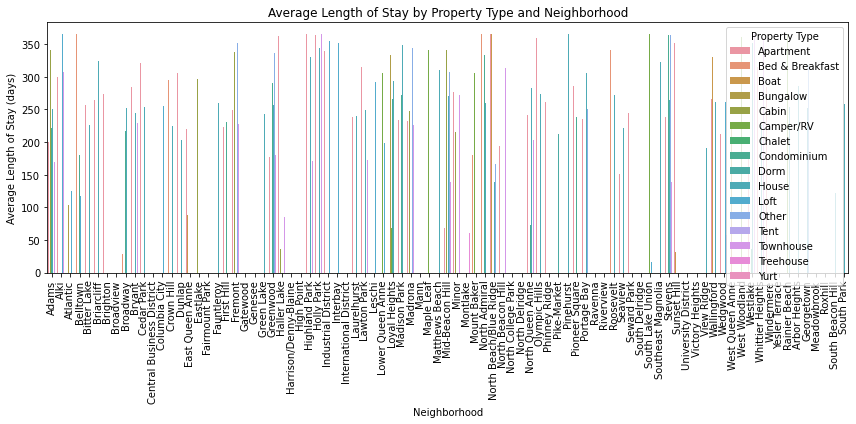

In [150]:
plt.figure(figsize=(12, 6))
sns.barplot(data=average_stay, x='neighbourhood_cleansed', y='average_length_of_stay', hue='property_type')
plt.title('Average Length of Stay by Property Type and Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Length of Stay (days)')
plt.xticks(rotation=90)
plt.legend(title='Property Type')
plt.tight_layout()
plt.show()

C:\Users\amaur\AppData\Local\Temp\ipykernel_27812\817577949.py:8: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.tight_layout()
C:\Users\amaur\AppData\Local\Temp\ipykernel_27812\817577949.py:8: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.tight_layout()


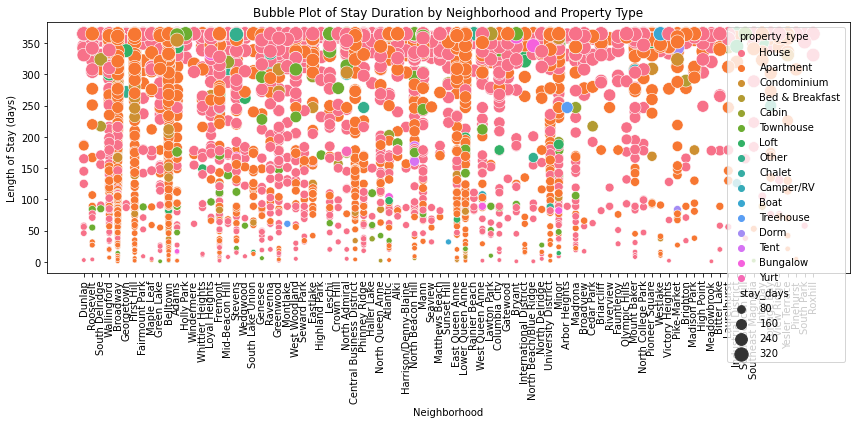

In [165]:
plt.figure(figsize=(12, 6));
sns.scatterplot(data=stay_duration, x='neighbourhood_cleansed', y='stay_days', size=stay_duration['stay_days'], hue='property_type', sizes=(20, 200))
plt.xticks(rotation=90)
plt.title('Bubble Plot of Stay Duration by Neighborhood and Property Type')
plt.xlabel('Neighborhood')
plt.ylabel('Length of Stay (days)')
plt.tight_layout()
plt.show();


In [174]:
average_stay_by_property_type = listings_df.groupby('property_type')['minimum_nights'].mean().sort_values()
average_stay_by_property_type

property_type
Dorm               1.000000
Tent               1.000000
Yurt               1.000000
Boat               1.375000
Other              1.500000
Camper/RV          1.538462
Townhouse          1.559322
Bungalow           1.615385
Bed & Breakfast    1.648649
Cabin              1.666667
Treehouse          1.666667
Loft               1.700000
House              2.186959
Condominium        2.274725
Chalet             2.500000
Apartment          2.690867
Name: minimum_nights, dtype: float64

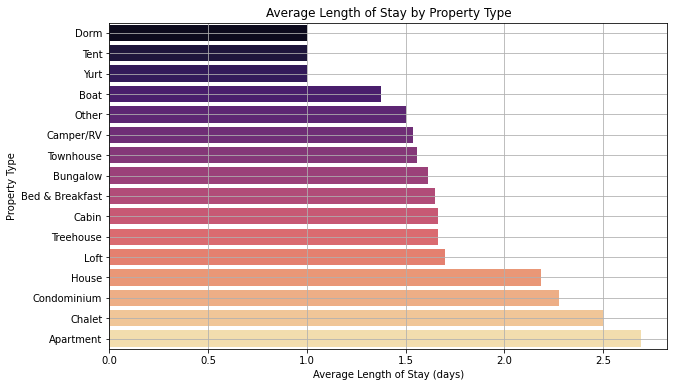

In [176]:
plt.figure(figsize=(10, 6))
sns.barplot(x=average_stay_by_property_type.values, y=average_stay_by_property_type.index, palette='magma')
plt.title('Average Length of Stay by Property Type')
plt.xlabel('Average Length of Stay (days)')
plt.ylabel('Property Type')
plt.grid(True)
plt.show()

In [178]:
average_stay_by_neighborhood = listings_df.groupby('neighbourhood_cleansed')['minimum_nights'].mean().sort_values()
average_stay_by_neighborhood

neighbourhood_cleansed
South Beacon Hill        1.250000
Pioneer Square           1.304348
Holly Park               1.333333
South Park               1.333333
Industrial District      1.333333
                           ...   
South Lake Union         3.037037
Cedar Park               3.250000
High Point               3.500000
Harrison/Denny-Blaine    4.142857
Broadway                 4.518892
Name: minimum_nights, Length: 87, dtype: float64

In [182]:
neighborhood_count = len(average_stay_by_neighborhood)
half = neighborhood_count // 2
first_half_neighborhoods = average_stay_by_neighborhood.iloc[:half]
second_half_neighborhoods = average_stay_by_neighborhood.iloc[half:]


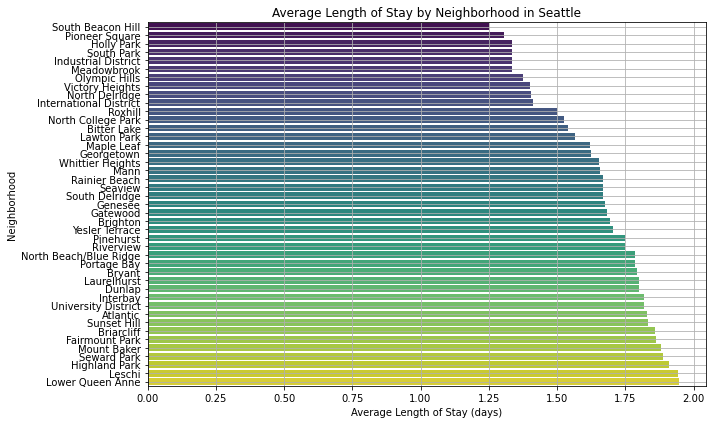

In [183]:
plt.figure(figsize=(10, 6))
sns.barplot(x=first_half_neighborhoods.values, y=first_half_neighborhoods.index, palette='viridis')
plt.title('Average Length of Stay by Neighborhood in Seattle')
plt.xlabel('Average Length of Stay (days)')
plt.ylabel('Neighborhood')
plt.grid(True)
plt.tight_layout()  
plt.show()

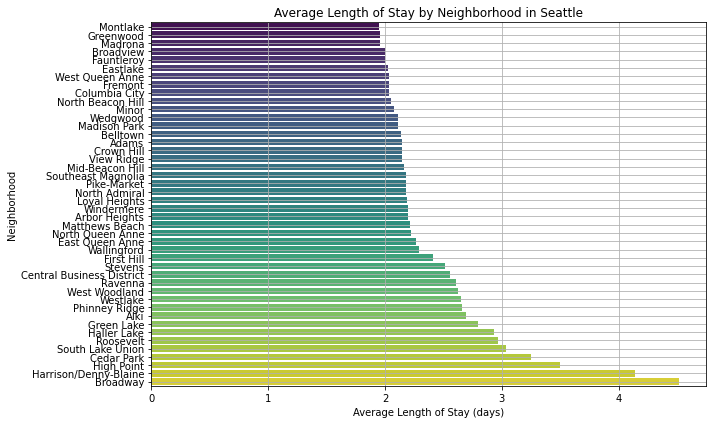

In [185]:
plt.figure(figsize=(10, 6))
sns.barplot(x=second_half_neighborhoods.values, y=second_half_neighborhoods.index, palette='viridis')
plt.title('Average Length of Stay by Neighborhood in Seattle')
plt.xlabel('Average Length of Stay (days)')
plt.ylabel('Neighborhood')
plt.grid(True)
plt.tight_layout() 
plt.show()